<a href="https://colab.research.google.com/github/sivaait023/Entevyuv-10.0/blob/main/Estimating_video_likes_using_comment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk as NLTK

In [5]:
Video_dataframe=pd.read_csv("videos-stats.csv")
Video_dataframe.drop("Unnamed: 0",axis=1,inplace=True)

Video_dataframe.head(5)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [8]:
comments_dataframe=pd.read_csv("comments.csv")
comments_dataframe.drop("Unnamed: 0",axis=1,inplace=True)

comments_dataframe.head(5)

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [9]:
Video_dataframe.shape

(1881, 7)

In [10]:
Video_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


In [11]:
Video_dataframe.isnull().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [12]:
Video_dataframe.dropna(inplace=True)

In [13]:
Video_dataframe['Comments']=Video_dataframe['Comments'].astype(int)
Video_dataframe['Likes']=Video_dataframe['Likes'].astype(int)
Video_dataframe['Views']=Video_dataframe['Views'].astype(int)
Video_dataframe['Published At']=pd.to_datetime(Video_dataframe['Published At'])

In [14]:
Video_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 0 to 1878
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         1879 non-null   object        
 1   Video ID      1879 non-null   object        
 2   Published At  1879 non-null   datetime64[ns]
 3   Keyword       1879 non-null   object        
 4   Likes         1879 non-null   int64         
 5   Comments      1879 non-null   int64         
 6   Views         1879 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 117.4+ KB


In [15]:
Video_dataframe

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644
...,...,...,...,...,...,...,...
1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861,184,37959
1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615,648,319957
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259,416,386360
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981,72,431421


In [16]:
Video_dataframe.describe()

,Likes,Comments,Views
count,1.879000e+03,1879.000000,1.879000e+03
mean,1.700610e+05,7863.331559,1.161292e+07
std,7.962293e+05,37879.964926,1.084450e+08
min,-1.000000e+00,-1.000000,2.500000e+01
25%,2.672500e+03,199.000000,8.451500e+04
50%,1.478700e+04,814.000000,5.917210e+05
75%,6.090600e+04,3377.500000,2.804978e+06
max,1.644556e+07,732818.000000,4.034122e+09


In [17]:
Video_dataframe['Title'].value_counts()

What is Machine Learning?                                                                                3
ASMR MUKBANG 직접 만든 양념 치킨먹방! 스테이크 짜파게티 레시피 &amp; 먹방 FRIED CHICKEN AND BLACK BEAN NOODLES EATING SOUND!    3
Tiësto - The Business (Lyrics)                                                                           3
Official Trailer | She-Hulk: Attorney at Law | Disney+                                                   2
20 Minecraft Block Facts You Maybe Didn&#39;t Know                                                       2
                                                                                                        ..
Interview-Flop: ÖVP-Innenminister Gerhard Karner bei Armin Wolf zur Abschiebung von Tina                 1
11 SMART things to SAY in an INTERVIEW! (Interview Tips for Freshers &amp; Experienced Candidates!)      1
Leon Edwards’ Emotional First Interview Since Shocking the World at UFC 278 - MMA Fighting               1
Top Interview Tips: Common Questions,

In [18]:
Video_dataframe['Keyword'].value_counts()

minecraft           50
asmr                50
mrbeast             50
cnn                 50
history             50
interview           50
physics             50
reaction            50
cubes               50
crypto              50
tutorial            50
marvel              50
data science        50
game development    50
trolling            50
xbox                49
sat                 49
sports              49
tech                48
computer science    48
nintendo            48
food                48
machine learning    48
how-to              48
business            48
chess               47
biology             47
music               46
literature          46
google              45
movies              45
mukbang             45
bed                 44
gaming              43
apple               42
lofi                41
news                39
finance             39
animals             38
education           24
mathchemistry       15
Name: Keyword, dtype: int64

In [19]:
Video_dataframe['Keyword'].nunique()

41

In [20]:
Video_dataframe.corr()

<ipython-input-20-de7b216cda03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Video_dataframe.corr()


,Likes,Comments,Views
Likes,1.000000,0.892284,0.754475
Comments,0.892284,1.000000,0.659654
Views,0.754475,0.659654,1.000000


<BarContainer object of 1879 artists>

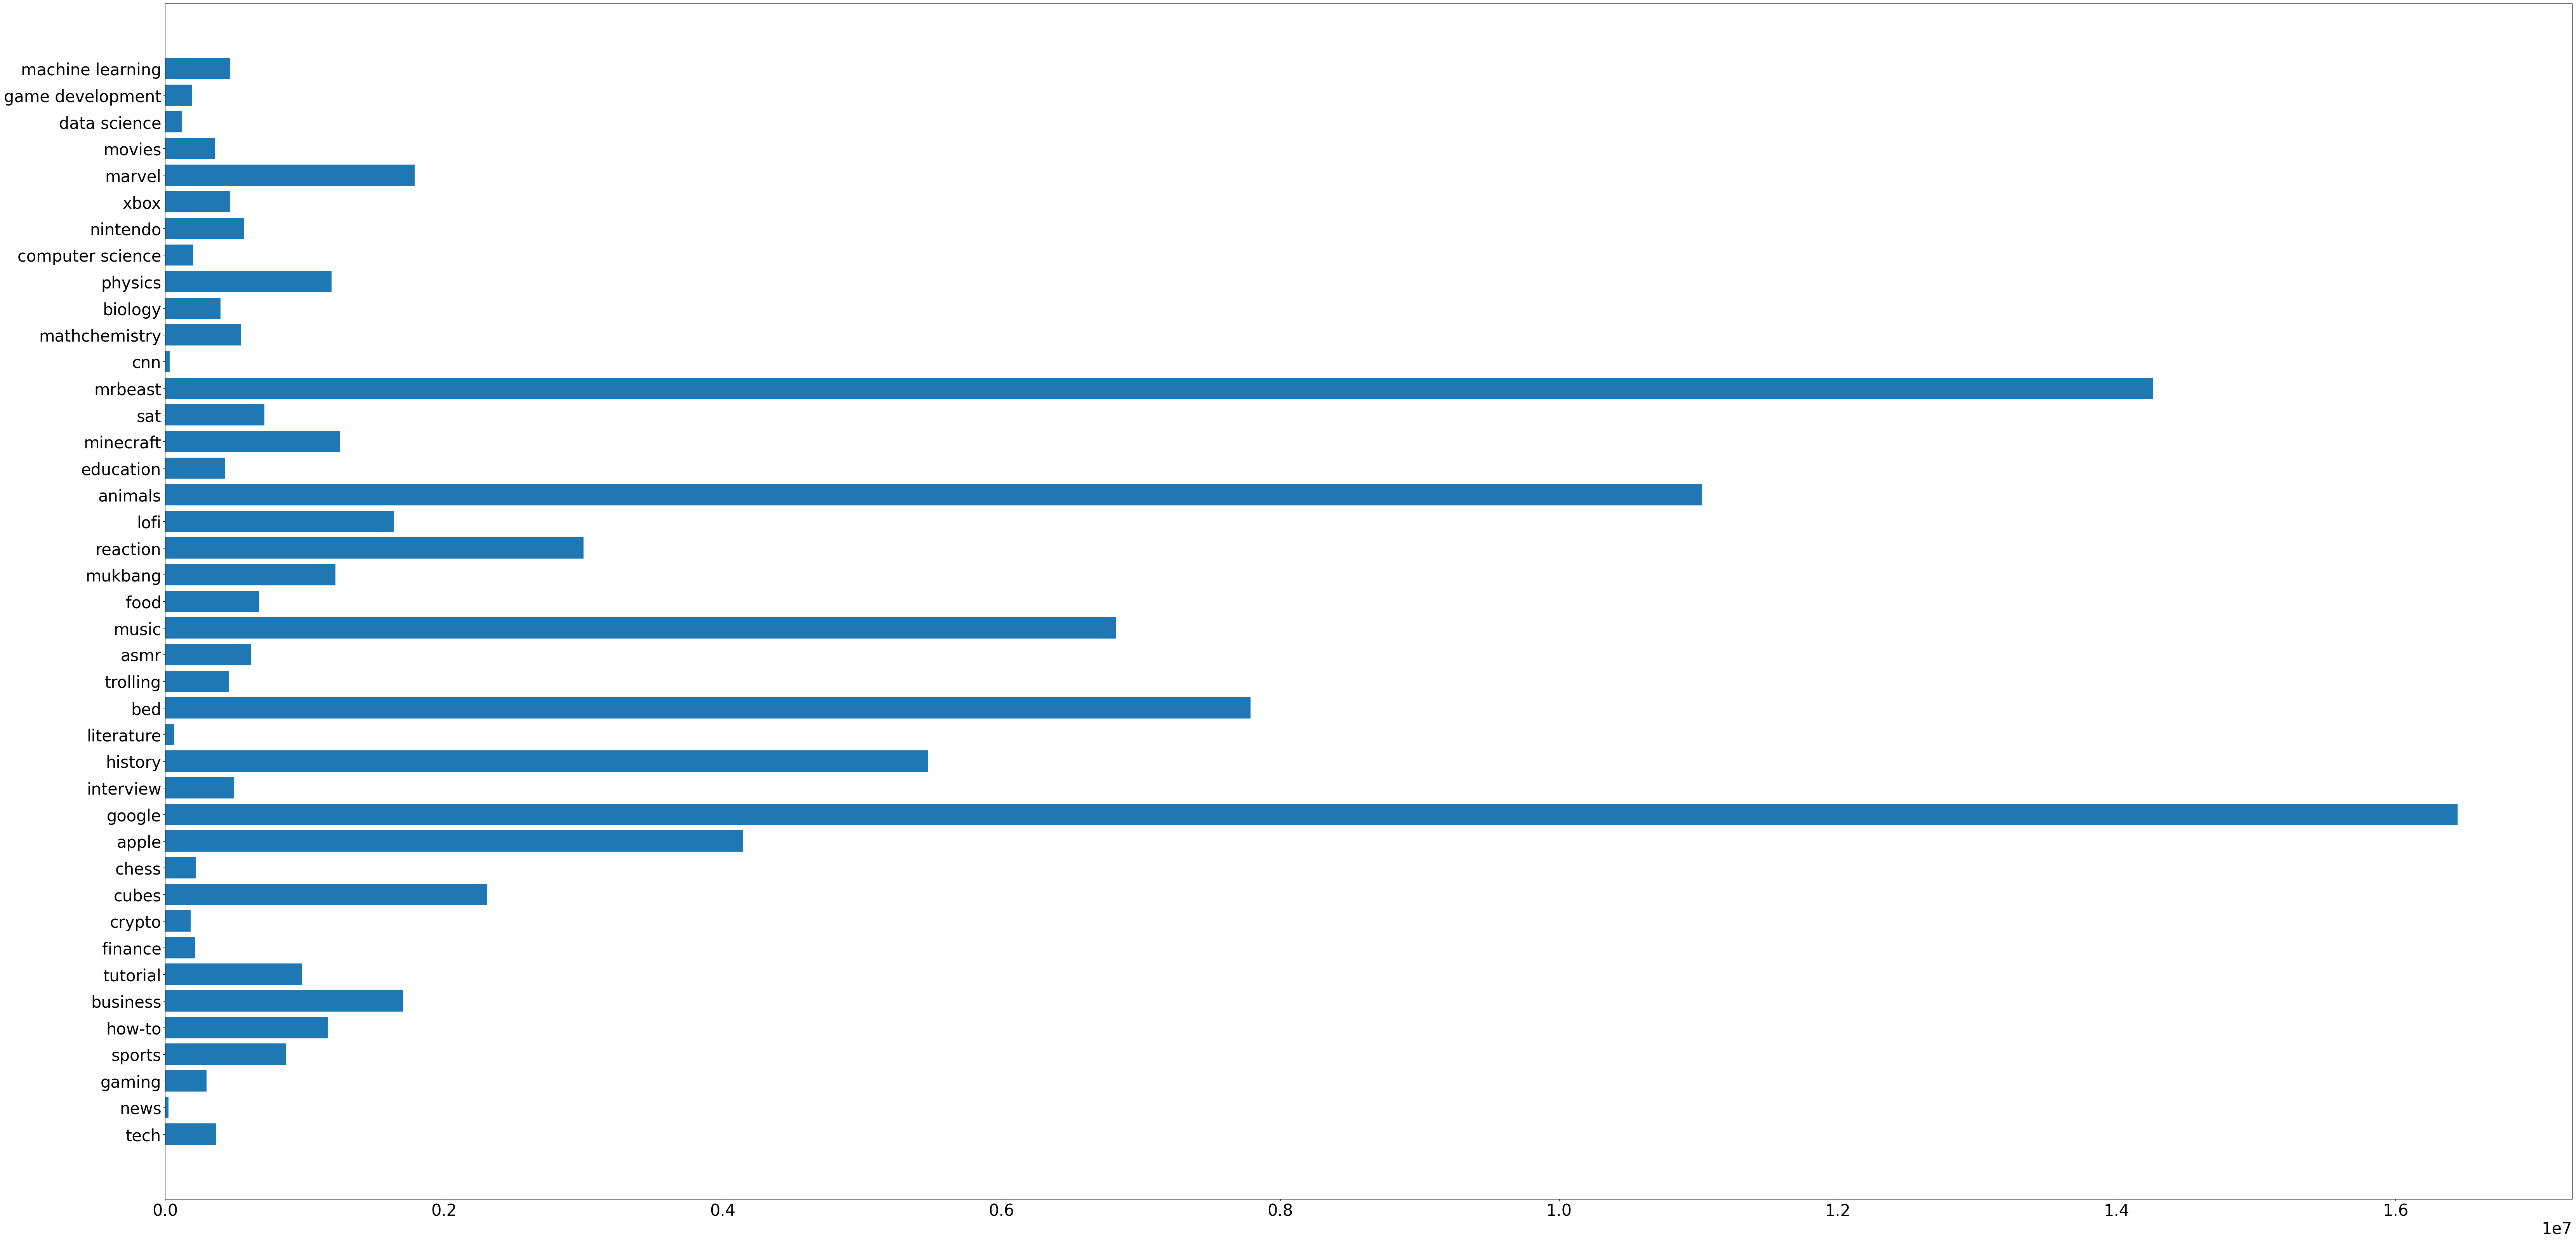

In [38]:
plt.figure(figsize=(80,40))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.barh(y=Video_dataframe.Keyword,width=Video_dataframe['Likes'],)

<BarContainer object of 1879 artists>

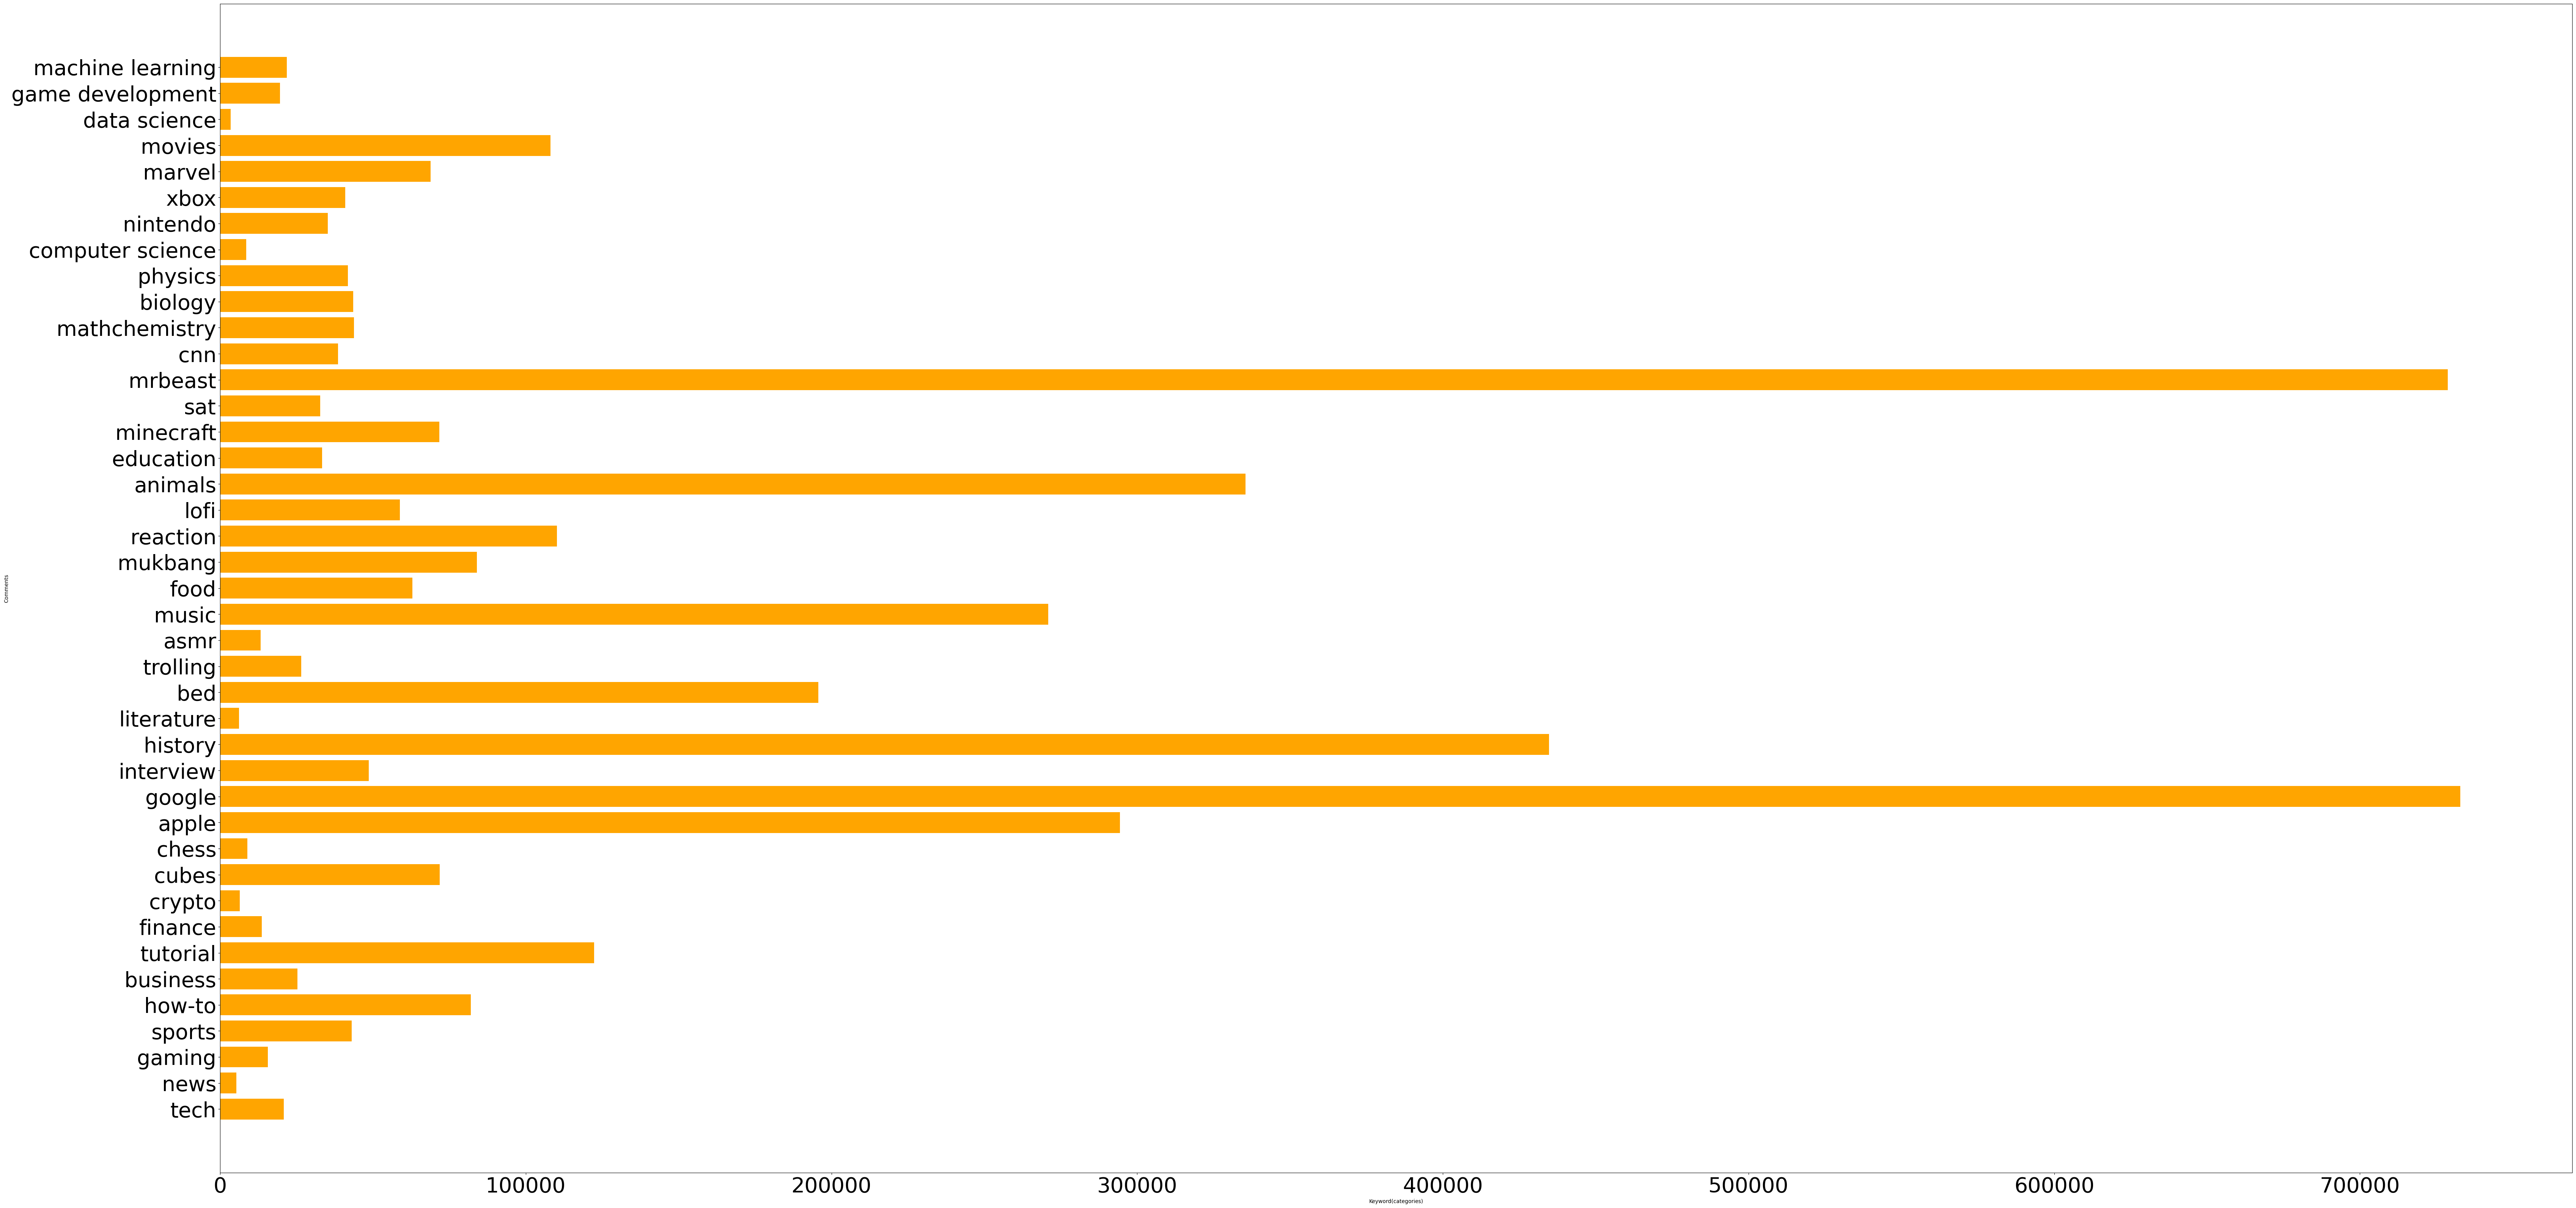

In [41]:
plt.figure(figsize=(80,40))
plt.xlabel("Keyword(categories)")
plt.ylabel("Comments")
plt.rc('xtick', labelsize=40)
plt.rc('ytick', labelsize=40)
plt.barh(y=Video_dataframe.Keyword,width=Video_dataframe['Comments'],color='Orange')

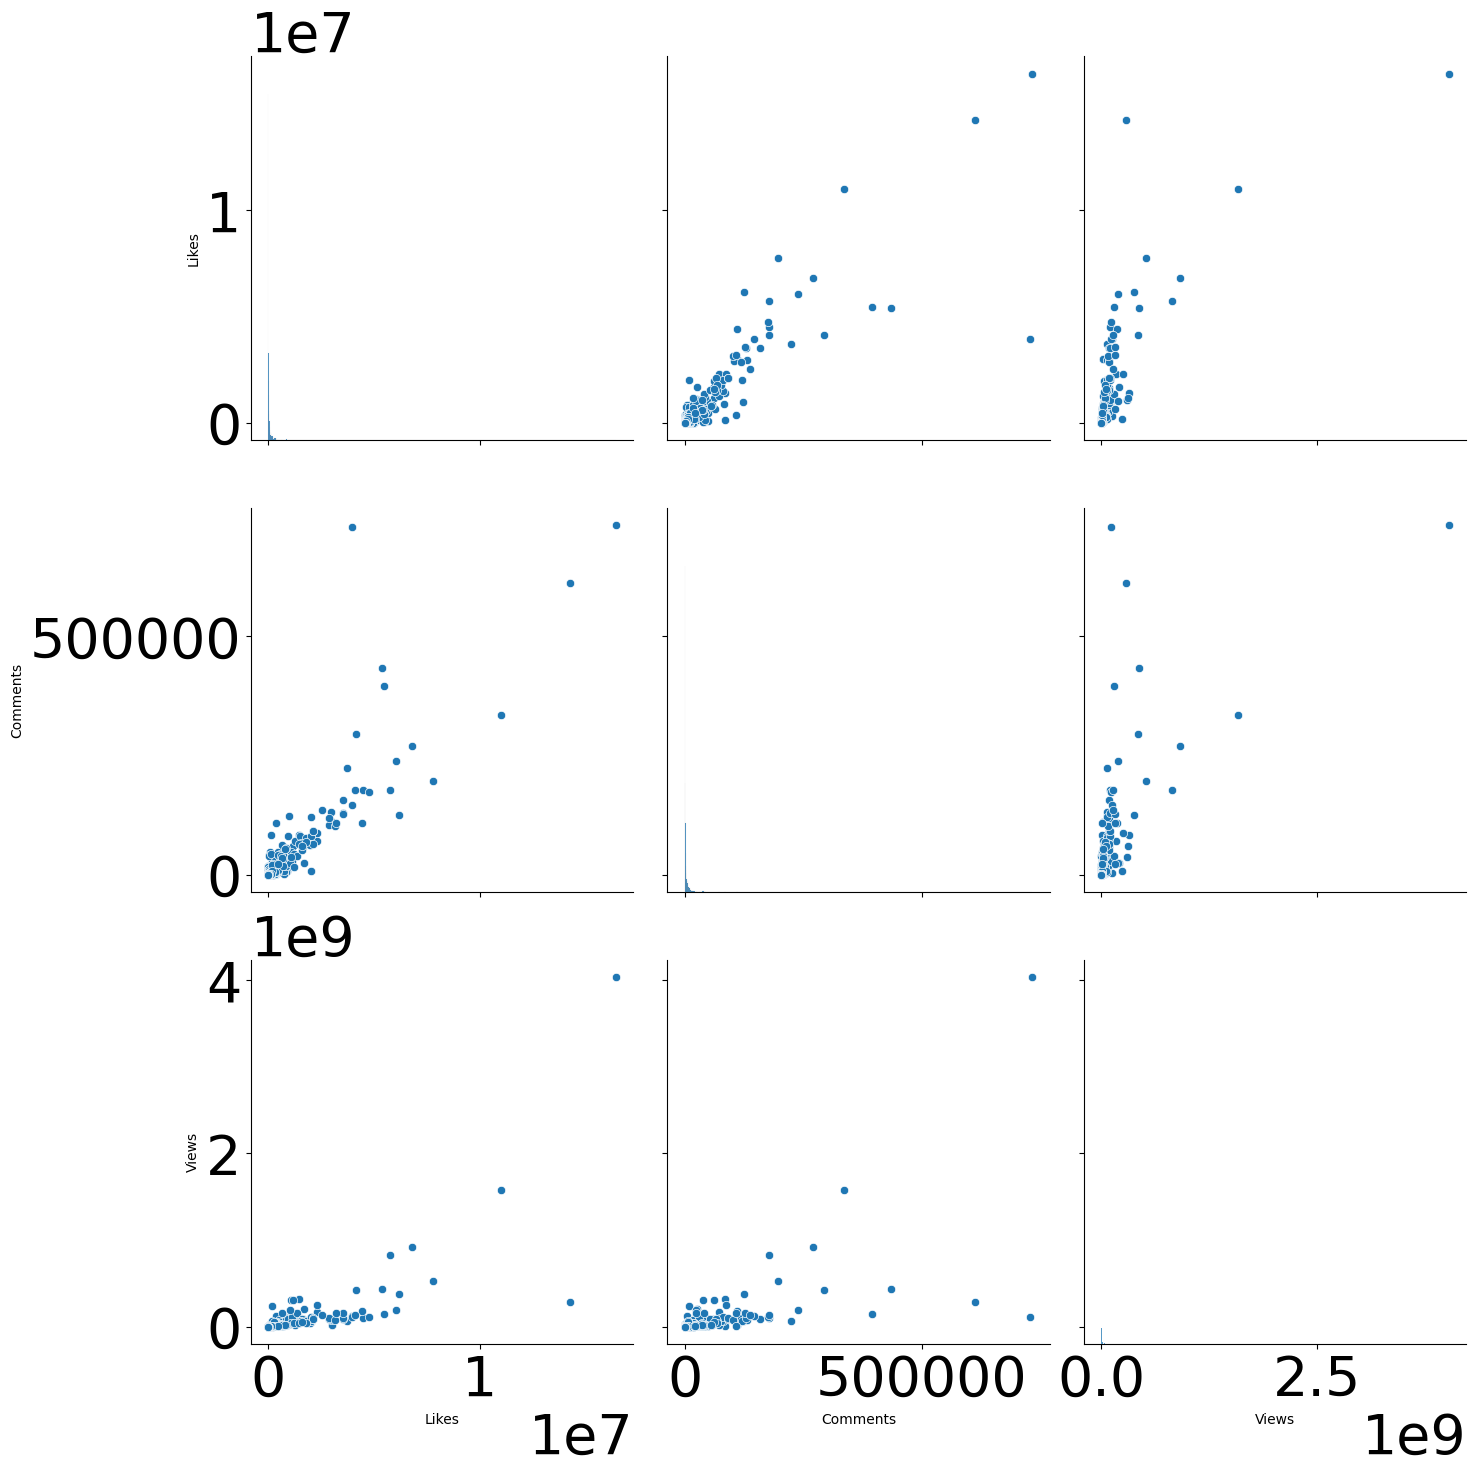

In [48]:
plt.rc('xtick', labelsize=40)
plt.rc('ytick', labelsize=40)
sns.pairplot(Video_dataframe,height=5)

In [24]:
comments_dataframe.isnull().sum()

Video ID     0
Comment      1
Likes        0
Sentiment    0
dtype: int64

In [25]:
comments_dataframe.shape

(18409, 4)

In [26]:
comments_dataframe.dropna(inplace=True)

In [27]:
comments_dataframe.shape

(18408, 4)

In [28]:
comments_dataframe.describe()

,Likes,Sentiment
count,18408.000000,18408.000000
mean,1040.075891,1.494024
std,10651.652720,0.709938
min,0.000000,0.000000
25%,5.000000,1.000000
50%,29.000000,2.000000
75%,190.000000,2.000000
max,891372.000000,2.000000


In [29]:
comments_dataframe['Likes']=comments_dataframe['Likes'].astype(int)
comments_dataframe['Sentiment']=comments_dataframe['Sentiment'].astype(object)
comments_dataframe['Comment']=comments_dataframe['Comment'].astype(str)

In [30]:
comments_dataframe['Sentiment'].value_counts()

2.0    11432
1.0     4638
0.0     2338
Name: Sentiment, dtype: int64

<Axes: ylabel='Sentiment'>

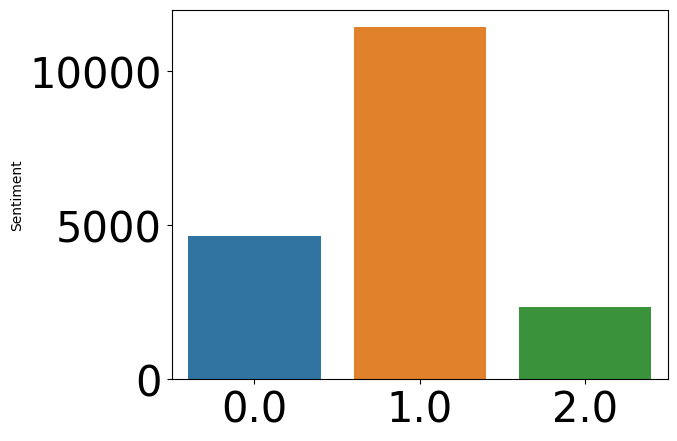

In [31]:
sns.barplot(comments_dataframe,x=comments_dataframe['Sentiment'].unique(),y=comments_dataframe['Sentiment'].value_counts())

In [32]:
NLTK.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
import re
import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np

In [34]:
comments1=pd.DataFrame(comments_dataframe['Comment'].astype(str))

In [35]:
len(comments_dataframe)

18408

In [52]:
word_tokens = []
for idx, comment in enumerate(comments_dataframe['Comment']):
  word_token = word_tokenize(comment)
  word_tokens.append(word_token)



In [53]:
word_tokens = np.array(word_tokens)
word_tokens

array([list(['Let', "'s", 'not', 'forget', 'that', 'Apple', 'Pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iPhone', 'in', 'order', 'to', 'use', 'it', '.', 'A', 'significant', 'portion', 'of', 'Apple', "'s", 'user', 'base', 'was', "n't", 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', '.', 'As', 'each', 'successive', 'iPhone', 'incorporated', 'the', 'technology', 'and', 'older', 'iPhones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased', '.']),
       list(['Here', 'in', 'NZ', '50', '%', 'of', 'retailers', 'don', '’', 't', 'even', 'have', 'contactless', 'credit', 'card', 'machines', 'like', 'pay-wave', 'which', 'support', 'Apple', 'Pay', '.', 'They', 'don', '’', 't', 'like', 'the', 'high', 'fees', 'that', 'come', 'with', 'these', '.']),
       list(['I', 'will', 'forever', 'acknowledge', 'this', 'channel', 'with', 'the', 'help', 'of', 'your', 'lessons', 'and', 'ideas', 'explanations', ',', 'Now', 'It',